## <p style="text-align: center;">pythonchallenge.com</p>

##### <p style="text-align: center;">Ex. I</p>

In [1]:
import requests
from lxml.html import fromstring

# http://www.pythonchallenge.com/pc/def/0.html
base_url = 'http://www.pythonchallenge.com/pc/def/{}.html'
sol1 = 2**38
url1 = base_url.format(sol1)
url1

'http://www.pythonchallenge.com/pc/def/274877906944.html'

##### <p style="text-align: center;">Ex. II</p>

In [2]:
import string

# http://www.pythonchallenge.com/pc/def/map.html
pinkstr = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."

letters = string.ascii_lowercase
total = len(letters)
letters_dict = {letters[idx]: letters[(idx+2) % total] for idx in range(total)}

def transform(ltrs):
    return ''.join([letters_dict[i] if i.isalpha() else i for i in ltrs])

transform(pinkstr)

"i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url."

In [3]:
sol2 = transform('map')
url2 = base_url.format(sol2)
url2

'http://www.pythonchallenge.com/pc/def/ocr.html'

##### <p style="text-align: center;">Ex. III</p>

In [4]:
# http://www.pythonchallenge.com/pc/def/ocr.html

import re
from collections import Counter

resp3 = requests.get(url2)

extr = re.findall(r'(?<=\n-->\n\n<!--\n).*(?=-->\n\n)', resp3.text, re.DOTALL)[0]
counter = Counter(extr)
sol3 = ''.join([i[0] for i in counter.items() if i[1] == 1])
url3 = base_url.format(sol3)
url3

'http://www.pythonchallenge.com/pc/def/equality.html'

##### <p style="text-align: center;">Ex. IV</p>

In [5]:
# 'http://www.pythonchallenge.com/pc/def/equality.html'

resp4 = requests.get(url3)
# below regex pattern doesn't handle edge cases when text starts or ends with 3 "big bodyguards".
sol4 = ''.join(re.findall(r'[^A-Z][A-Z]{3}([a-z])[A-Z]{3}[^A-Z]', resp4.text, re.DOTALL))
url4 = base_url.format(sol4)
url4

'http://www.pythonchallenge.com/pc/def/linkedlist.html'

##### <p style="text-align: center;">Ex. V</p>

In [6]:
# http://www.pythonchallenge.com/pc/def/linkedlist.php

url4 = 'http://www.pythonchallenge.com/pc/def/linkedlist.php'
chain_url = 'http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing={}'

def extract_num(txt):
    return re.findall(r'nothing[\D]+(\d+)', txt)

resp5 = requests.get(url4)
num = extract_num(resp5.text)[0]
for _ in range(400):
    r = requests.get(chain_url.format(num))
    n = extract_num(r.text)
    
    if n:
        num = n[0]
    else:
        txt = r.text
        print(txt)
        print(num)
        if '.html' in txt:
            sol5 = txt.replace('.html', '')
            url5 = base_url.format(sol5)
            print(url5)
            break
              
        inp = input('Enter a value:')
        if inp:
            num = inp
            continue
        break

Yes. Divide by two and keep going.
16044
Enter a value:8022
peak.html
66831
http://www.pythonchallenge.com/pc/def/peak.html


##### <p style="text-align: center;">Ex. VI</p>

In [7]:
# http://www.pythonchallenge.com/pc/def/peak.html

import pickle

url5 = 'http://www.pythonchallenge.com/pc/def/peak.html'
resp6 = requests.get(url5)

banner = re.findall(r'(?<=src=").*?(?="/>)', resp6.text, re.DOTALL)[1]
banner_url = base_url.format(banner).replace('.html', '')
banner_resp = requests.get(banner_url)

tab = pickle.loads(banner_resp.content)

for row in tab:
    for col in row:
        print(col[0]*col[1], end='')
    print('')

# "channel" should be printed out.
sol6 = 'channel'
url6 = base_url.format(sol6)
print(url6)

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

##### <p style="text-align: center;">Ex. VII</p>

In [8]:
# http://www.pythonchallenge.com/pc/def/channel.html

from zipfile import ZipFile
from io import BytesIO

resp7 = requests.get(url6)
print(resp7.text[:100], end='\n')
resp7b = requests.get(url6.replace('html', 'zip'))

zipf = ZipFile(BytesIO(resp7b.content))
all_files = [f.filename for f in zipf.filelist]

print(zipf.open(all_files[-1]).read().decode('utf-8'))

start_file = zipf.open('90052.txt').read().decode('utf-8')

def extract_num(txt):
    return re.findall(r'nothing[\D]+(\d+)', txt)

nn = extract_num(start_file)[0]
for i in range(len(all_files)):
    print(zipf.getinfo(nn + '.txt').comment.decode(), end='')
    temp_file = zipf.open(nn + '.txt').read().decode('utf-8')
#     print(temp_file)
    nn = extract_num(temp_file)
    if nn:
        nn = nn[0]
    else:
#         print(temp_file)
        break

sol7 = 'http://www.pythonchallenge.com/pc/def/hockey.html'
resp8 = requests.get(sol7)
print(resp8.text)

sol8 = 'oxygen'
url9 = base_url.format(sol8)
print(url9)

<html> <!-- <-- zip -->
<head>
  <title>now there are pairs</title>
  <link rel="stylesheet" type="t
welcome to my zipped list.

hint1: start from 90052
hint2: answer is inside the zip

***************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
***********************************

##### <p style="text-align: center;">Ex. VIII</p>

In [9]:
from PIL import Image

# http://www.pythonchallenge.com/pc/def/oxygen.html

resp9 = requests.get(url9)
resp9.text

img9 = requests.get(url9.replace('.html', '.png'))
img9b = Image.open(BytesIO(img9.content))
print("Image size:", img9b.size)

chars = []
for pix in range(0, img9b.size[0], 7):
    rgba = img9b.getpixel((pix, 48))
    if rgba[0] == rgba[1] == rgba[2]:
        chars.append(chr(rgba[0]))

message9 = ''.join(chars)
print(message9)

sol9 = ''.join(chr(int(c)) for c in re.findall(r'\d+', message9))
url10 = base_url.format(sol9)
print(url10)

Image size: (629, 95)
smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]
http://www.pythonchallenge.com/pc/def/integrity.html


##### <p style="text-align: center;">Ex. IX</p>

In [10]:
# http://www.pythonchallenge.com/pc/def/integrity.html

import bz2

# BZh - bz2 file signature --> https://en.wikipedia.org/wiki/List_of_file_signatures
# bz2 is coded in 8-bits, so latin-1 encoding.

resp10 = requests.get(url10)
resp10_txt = resp10.text

un = re.findall(r"un: \'(.*)'", resp10_txt)[0].encode('latin-1').decode('unicode-escape').encode('latin-1')
pw = re.findall(r"pw: \'(.*)'", resp10_txt)[0].encode('latin-1').decode('unicode-escape').encode('latin-1')
usr = bz2.decompress(un).decode('latin-1')
pas = bz2.decompress(pw).decode('latin-1')
sol10_autho = (usr, pas)

sol10_href = re.findall(r'href="../(.*)" ', resp10_txt)[0]
url11 = base_url.split('def')[0] + sol10_href

print(sol10_autho)
print(url11)

('huge', 'file')
http://www.pythonchallenge.com/pc/return/good.html


##### <p style="text-align: center;">Ex. X</p>

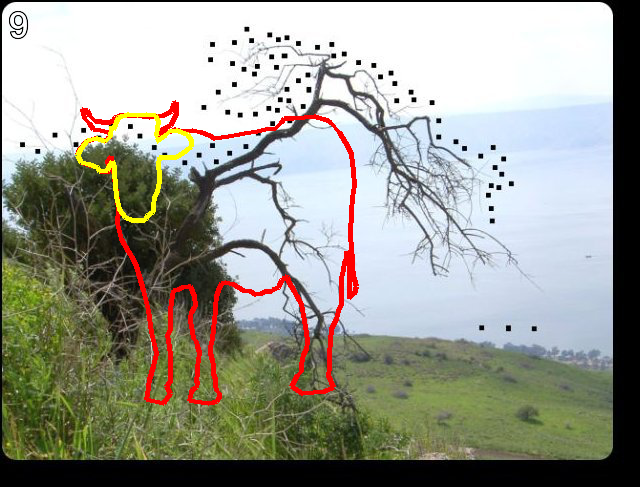

http://www.pythonchallenge.com/pc/return/bull.html


In [11]:
# http://www.pythonchallenge.com/pc/return/good.html ('huge', 'file')

from PIL import ImageDraw

resp11 = requests.get(url11, auth=sol10_autho)
img11 = requests.get(url11.replace('html', 'jpg'), auth=sol10_autho)

img11b = Image.open(BytesIO(img11.content))
lines = ImageDraw.Draw(img11b)

# Extract coords
first = re.findall(r'first:(.*)second', resp11.text, re.DOTALL)[0].strip()
second = re.findall(r'second:(.*)--', resp11.text, re.DOTALL)[0].strip()
fir = [int(d) for l in first.splitlines() for d in l.split(',') if d]
sec = [int(d) for l in second.splitlines() for d in l.split(',') if d]

# Draw lines.
lines.line(fir, fill='red', width=5)
lines.line(sec, fill='yellow', width=5)

display(img11b)

sol11 = 'bull'
url12 = base_url.format(sol11).replace('def', 'return')
print(url12)

##### <p style="text-align: center;">Ex. XI</p>

In [12]:
# http://www.pythonchallenge.com/pc/return/bull.html ('huge', 'file')

def look_and_say(seq):
    """https://en.wikipedia.org/wiki/Look-and-say_sequence"""
    len_seq = len(seq)
    next_seq = '1' + seq if len_seq == 1 else ''
    counter, current_value = 1, seq[0]
    for idx, i in enumerate(seq[1:]):
        if i == current_value:
            counter += 1
        else:
            next_seq = next_seq + str(counter) + current_value
            current_value = i
            counter = 1
        if idx + 2 == len_seq:
            next_seq = next_seq + str(counter) + current_value
    return next_seq

resp12 = requests.get(url12, auth=sol10_autho)
seq_txt = fromstring(resp12.text).xpath('//area/@href')[0]

url12b = url12.replace('bull.html', seq_txt)
resp12b = requests.get(url12b, auth=sol10_autho)

print(resp12b.text)
print('len(a[30]) = ?')

a = '1'
for _ in range(30):
    a = look_and_say(a)

sol12 = len(a) 
print('len(a[30]) = {}'.format(sol12))

url13 = base_url.format(sol12).replace('def', 'return')
print(url13, sol10_autho)

a = [1, 11, 21, 1211, 111221, 

len(a[30]) = ?
len(a[30]) = 5808
http://www.pythonchallenge.com/pc/return/5808.html ('huge', 'file')


##### <p style="text-align: center;">Ex. XII</p>

<html>
<head>
  <title>odd even</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
	<br><br>
	<center>
	<img src="cave.jpg" width="640" height="480" border="0"/>
	<br>
	<br>
	<font color="gold" size="+1"></font>
</body>
</html>



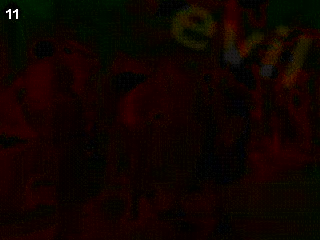

http://www.pythonchallenge.com/pc/return/evil.html


In [13]:
# http://www.pythonchallenge.com/pc/return/5808.html ('huge', 'file')

resp13 = requests.get(url13, auth=sol10_autho)
print(resp13.text)

src_cave = fromstring(resp13.text).xpath('//img/@src')[0]
resp13b = requests.get(url13.split(str(sol12))[0] + src_cave, auth=sol10_autho)
img13 = Image.open(BytesIO(resp13b.content))

even_interlaced = img13.resize((img13.size[0] // 2, img13.size[1] // 2), Image.NEAREST)  # use nearest neighbour
display(even_interlaced)

sol13 = 'evil'
url14 = base_url.format(sol13).replace('def', 'return')
print(url14)

##### <p style="text-align: center;">Ex. XIII</p>

<html>
<head>
  <title>dealing evil</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
<center>
<img src="evil1.jpg"><br>
</body>
</html>



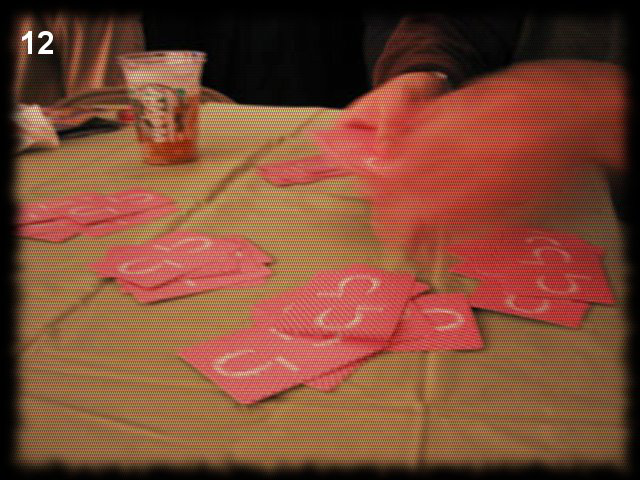

In [14]:
# http://www.pythonchallenge.com/pc/return/evil.html ('huge', 'file')

resp14 = requests.get(url14, auth=sol10_autho)
print(resp14.text)

src_evil = fromstring(resp14.text).xpath('//img/@src')[0]
resp14b = requests.get(url14.split(str(sol13))[0] + src_evil, auth=sol10_autho)
img14 = Image.open(BytesIO(resp14b.content))

display(img14)